In [ ]:
import numpy as np
import tifffile as tiff

import matplotlib.pyplot as plt
from pathlib import Path


source = Path(r'C:/Users/miche/Documents/MATLAB/LENS Projects/Vignetting/CIDRE')
outdir = Path('C:/Users/miche/Desktop/HBP/Tools/mic/models/qspim_dskwd')


# emission wavelength [nm]
wl = 561
view = 'l'

# Broca's area slice ID
slc = f'broca_{wl}nm'


**View flat-field model**

Original flat-field model shape: (779, 16812)


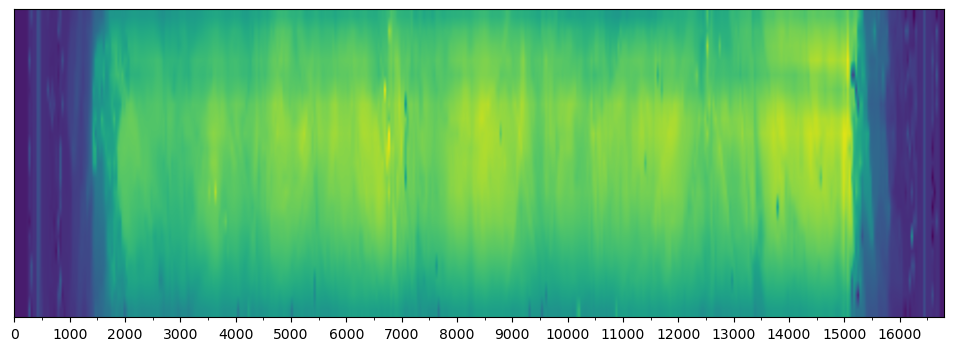

In [2]:
import scipy.io
import matplotlib.ticker as ticker


v = scipy.io.loadmat(source / f'v_qspim_{wl}nm_I38.mat')['v']
z = scipy.io.loadmat(source / f'z_qspim_{wl}nm_I38.mat')['z']

orig_shape = v.shape
print(f"Original flat-field model shape: {orig_shape}")

if orig_shape[0] > orig_shape[1]:
    v = np.swapaxes(v, 0, 1)
    z = np.swapaxes(z, 0, 1)
    

fig, ax = plt.subplots(figsize=(12, 4))
ax.imshow(v)
ax.set_aspect('auto')
ax.set_yticks([])
ax.minorticks_on()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))  # Major ticks every 1000
ax.xaxis.set_minor_locator(ticker.MultipleLocator(500))   # Minor ticks every 500
plt.show()


**Manual crop by visual inspection**

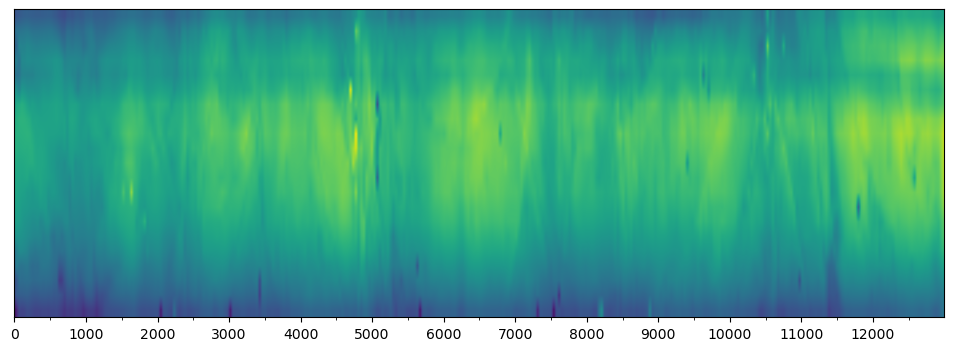

In [3]:
crop_s = 2000
crop_e = 15000

v = v[:, crop_s:crop_e]
z = z[:, crop_s:crop_e]

fig, ax = plt.subplots(figsize=(12, 4))
ax.imshow(v)
ax.set_aspect('auto')
ax.set_yticks([])
ax.minorticks_on()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))  # Major ticks every 1000
ax.xaxis.set_minor_locator(ticker.MultipleLocator(500))   # Minor ticks every 500
plt.show()


**Average and replicate along horizontal x-axis**

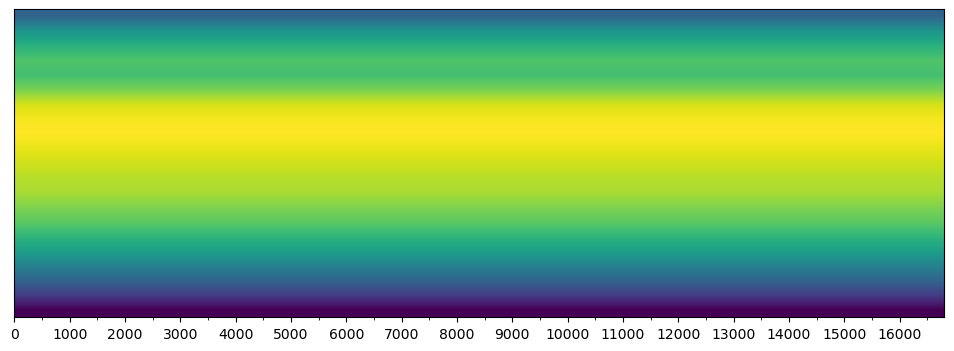

Output flat-field model shape: (779, 16812)


In [ ]:
v = np.repeat(np.mean(v, axis=1)[:, np.newaxis], np.max(orig_shape), axis=1)
z = np.repeat(np.mean(z, axis=1)[:, np.newaxis], np.max(orig_shape), axis=1)

fig, ax = plt.subplots(figsize=(12, 4))
ax.imshow(v)
ax.set_aspect('auto')
ax.set_yticks([])
ax.minorticks_on()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))  # Major ticks every 1000
ax.xaxis.set_minor_locator(ticker.MultipleLocator(500))   # Minor ticks every 500
plt.show()


if orig_shape[0] > orig_shape[1]:
    v = np.swapaxes(v, 0, 1)
    z = np.swapaxes(z, 0, 1)

print(f"Output flat-field model shape: {v.shape}")

save_dir = outdir / f'{wl}_I38'
if not save_dir.exists():
    save_dir.mkdir(parents=True, exist_ok=True)
    
tiff.imwrite(save_dir / 'v.tif', v, compression='zlib')
tiff.imwrite(save_dir / 'z.tif', z, compression='zlib')
